In [24]:
#@ IMPORTING LIBRARIES:
import os
import shutil

import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras

from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [3]:
#@ INSPECTION:
import tensorflow
tensorflow.__version__

'2.9.2'

In [5]:
#@ UNZIPPING THE DATASET:
# !unzip /content/drive/MyDrive/Data/dragon.zip

In [6]:
#@ INITIALIZING PATH TO DATASET:
train_dir = './train'
test_dir = './test'

In [7]:
#@ INITIALIZING MODEL CREATION:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [8]:
#@ COMPILING THE MODEL:
model.compile(loss='binary_crossentropy',\
             optimizer=optimizers.SGD(learning_rate=0.002, momentum=0.8),\
             metrics=['acc'])

- Answer for Question1: `binary_crossentropy`.

In [9]:
#@ SUMMARY:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 64)                11214912  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11,215,873
Trainable params: 11,215,873
Non-trainable params: 0
____________________________________________

- Answer for Question2: 11,215,873

In [10]:
#@ INITIALIZING IMAGE DATAGENERATOR:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [11]:
#@ TRAINING DATAGENERATOR:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')

Found 1594 images belonging to 2 classes.


In [12]:
#@ VALIDATION DATAGENERATOR:
validation_generator = val_datagen.flow_from_directory(test_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 394 images belonging to 2 classes.


In [13]:
#@ INSPECTING:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [19]:
#@ TRAINING THE MODEL:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator)

Epoch 1/10
80/80 [==============================] - 9s 114ms/step - loss: 0.4787 - acc: 0.7961 - val_loss: 0.4133 - val_acc: 0.8477
Epoch 2/10
80/80 [==============================] - 9s 111ms/step - loss: 0.4040 - acc: 0.8174 - val_loss: 0.3995 - val_acc: 0.8223
Epoch 3/10
80/80 [==============================] - 9s 111ms/step - loss: 0.3563 - acc: 0.8557 - val_loss: 0.3538 - val_acc: 0.8477
Epoch 4/10
80/80 [==============================] - 9s 113ms/step - loss: 0.3091 - acc: 0.8752 - val_loss: 0.3345 - val_acc: 0.8528
Epoch 5/10
80/80 [==============================] - 9s 111ms/step - loss: 0.2739 - acc: 0.9028 - val_loss: 0.3209 - val_acc: 0.8629
Epoch 6/10
80/80 [==============================] - 9s 110ms/step - loss: 0.2435 - acc: 0.9109 - val_loss: 0.3324 - val_acc: 0.8655
Epoch 7/10
80/80 [==============================] - 9s 111ms/step - loss: 0.2246 - acc: 0.9210 - val_loss: 0.3094 - val_acc: 0.8731
Epoch 8/10
80/80 [==============================] - 9s 111ms/step - loss: 0.

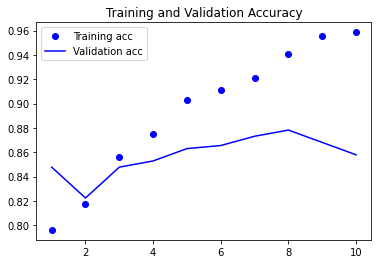

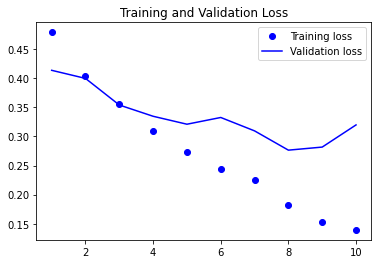

In [20]:
#@ PLOTTING LOSS AND ACCURACY:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [21]:
#@ MEDIAN OF ACCURACY:
acc_median = np.median(acc)
acc_median

0.9068381190299988

- Answer for Question3: 0.907

In [22]:
#@ STANDARD DEVIATION OF LOSS:
loss_std = np.std(loss)
loss_std

0.1054818735562764

- Answer for Question4: 0.105

In [23]:
#@ INITIALIZING DATA AUGMENTATION:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

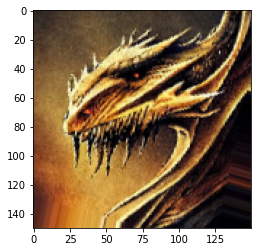

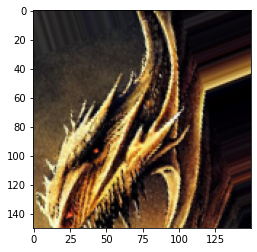

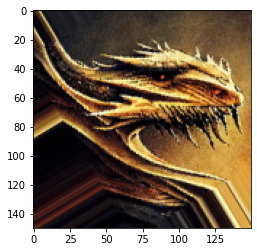

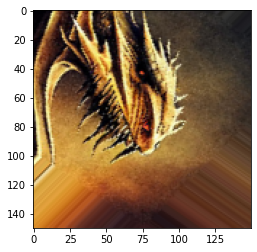

In [25]:
#@ INSPECTION:
fnames = [os.path.join(train_dir+"/dragon", fname) for
    fname in os.listdir(train_dir+"/dragon")]

img_path = fnames[0]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)

i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [26]:
#@ TRAINING DATA GENERATOR:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

In [27]:
#@ TEST DATA GENERATOR:
test_datagen = ImageDataGenerator(rescale=1./255)

In [28]:
#@ INITIALIZING DATA GENERATOR:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150), 
                                                    batch_size=32, 
                                                    class_mode='binary')

Found 1594 images belonging to 2 classes.


In [29]:
#@ INITIALIZING DATA GENERATOR:
validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

Found 394 images belonging to 2 classes.


In [30]:
#@ MODEL TRAINING WITH AUGMENTATION:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator)

Epoch 1/10
50/50 [==============================] - 16s 315ms/step - loss: 0.4292 - acc: 0.7892 - val_loss: 0.4968 - val_acc: 0.7766
Epoch 2/10
50/50 [==============================] - 15s 307ms/step - loss: 0.3757 - acc: 0.8331 - val_loss: 0.3787 - val_acc: 0.8452
Epoch 3/10
50/50 [==============================] - 15s 309ms/step - loss: 0.3665 - acc: 0.8394 - val_loss: 0.3146 - val_acc: 0.8604
Epoch 4/10
50/50 [==============================] - 17s 338ms/step - loss: 0.3661 - acc: 0.8394 - val_loss: 0.3551 - val_acc: 0.8655
Epoch 5/10
50/50 [==============================] - 17s 349ms/step - loss: 0.3644 - acc: 0.8438 - val_loss: 0.3297 - val_acc: 0.8553
Epoch 6/10
50/50 [==============================] - 17s 344ms/step - loss: 0.3685 - acc: 0.8363 - val_loss: 0.3487 - val_acc: 0.8477
Epoch 7/10
50/50 [==============================] - 17s 338ms/step - loss: 0.3484 - acc: 0.8551 - val_loss: 0.3631 - val_acc: 0.8503
Epoch 8/10
50/50 [==============================] - 18s 353ms/step - 

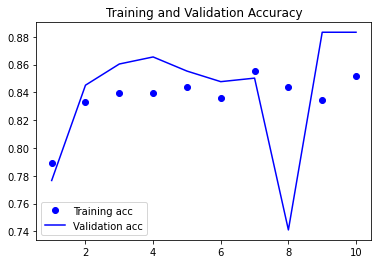

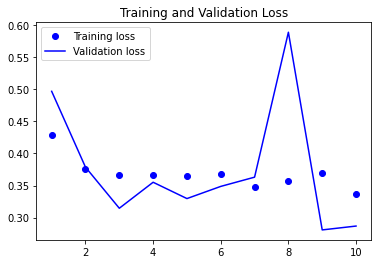

In [31]:
#@ INSPECTION ACCURACY AND LOSS:
acc_aug = history.history['acc']
val_acc_aug = history.history['val_acc']
loss_aug = history.history['loss']
val_loss_aug = history.history['val_loss']

epochs_aug = range(1, len(acc) + 1)

plt.plot(epochs_aug, acc_aug, 'bo', label='Training acc')
plt.plot(epochs_aug, val_acc_aug, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_aug, loss_aug, 'bo', label='Training loss')
plt.plot(epochs_aug, val_loss_aug, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [32]:
#@ MEAN OF VALIDATION LOSS:
loss_mean_aug = np.mean(val_loss_aug)
loss_mean_aug

0.3743335366249084

- Answer for Question5: 0.374

In [33]:
#@ INSPECTION:
val_acc_aug[5:10]

[0.8477157354354858,
 0.8502538204193115,
 0.7411167621612549,
 0.8832487463951111,
 0.8832487463951111]

In [34]:
#@ MEAN OF ACCURACY:
acc_mean_aug = np.mean(val_acc_aug[5:10])
acc_mean_aug

0.8411167621612549

Answer for Question6: 0.841